In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
cc_apps = pd.read_csv('C:\\Users\\Sambhu\\Desktop\\Imarticus\\Class Material\\kaggle\\cc_approval.csv')

In [3]:
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [4]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [5]:
cc_apps.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [6]:
cc_apps.Approved.value_counts()

0    383
1    307
Name: Approved, dtype: int64

In [7]:
categorical = ['Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'PriorDefault','Employed','Citizen']

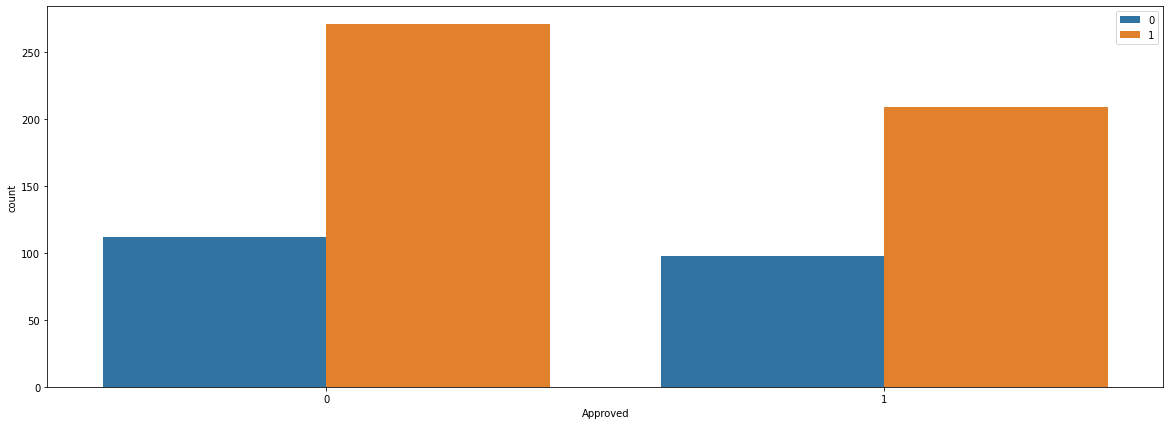

Gender  p-value  0.44723087514133186  Bad Predictor. There is no significant relationship between the variables


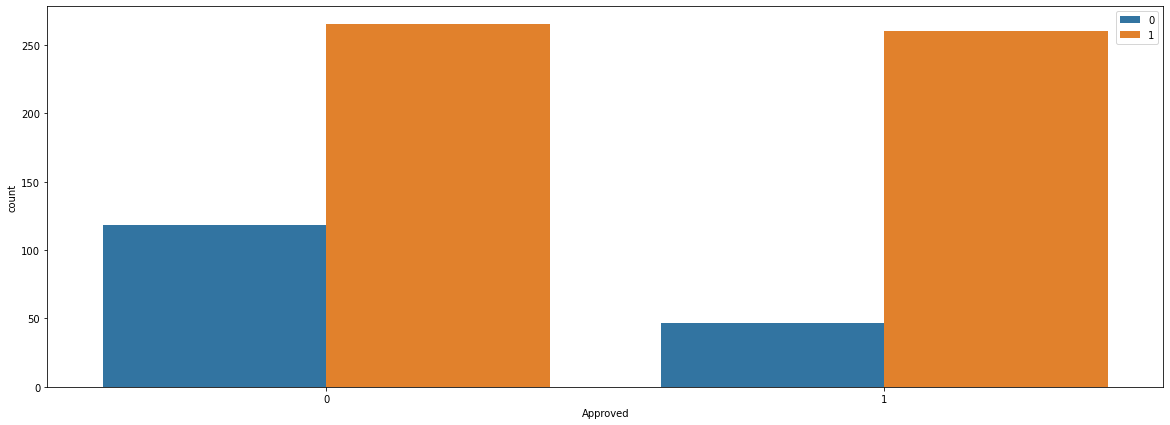

Married  p-value  2.100231920165588e-06  Good Predictor. There is significant relationship between the variables


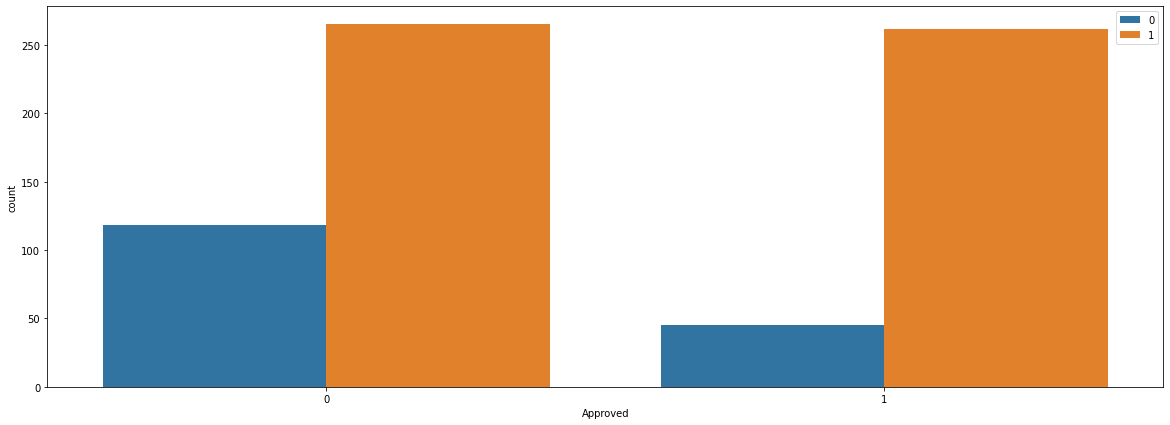

BankCustomer  p-value  6.91661320541803e-07  Good Predictor. There is significant relationship between the variables


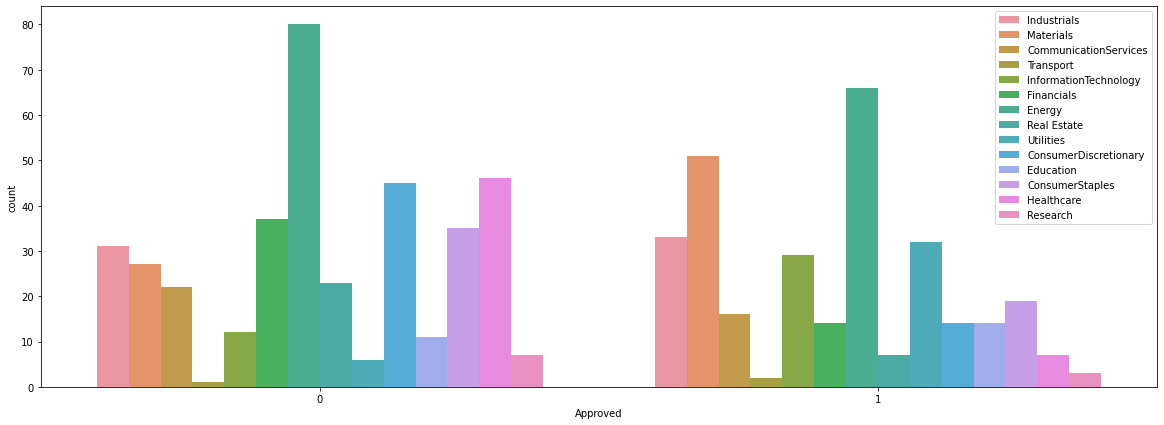

Industry  p-value  3.502987066102042e-15  Good Predictor. There is significant relationship between the variables


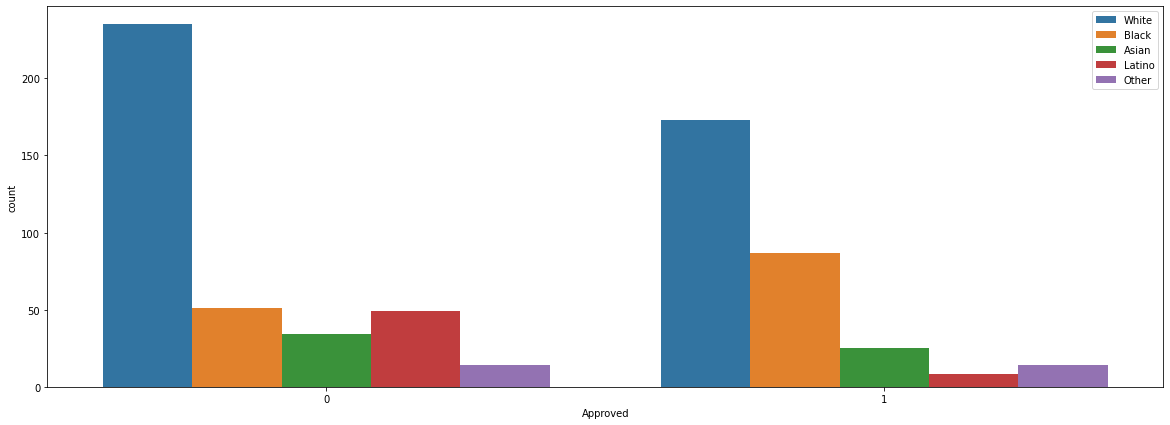

Ethnicity  p-value  1.823665654934685e-08  Good Predictor. There is significant relationship between the variables


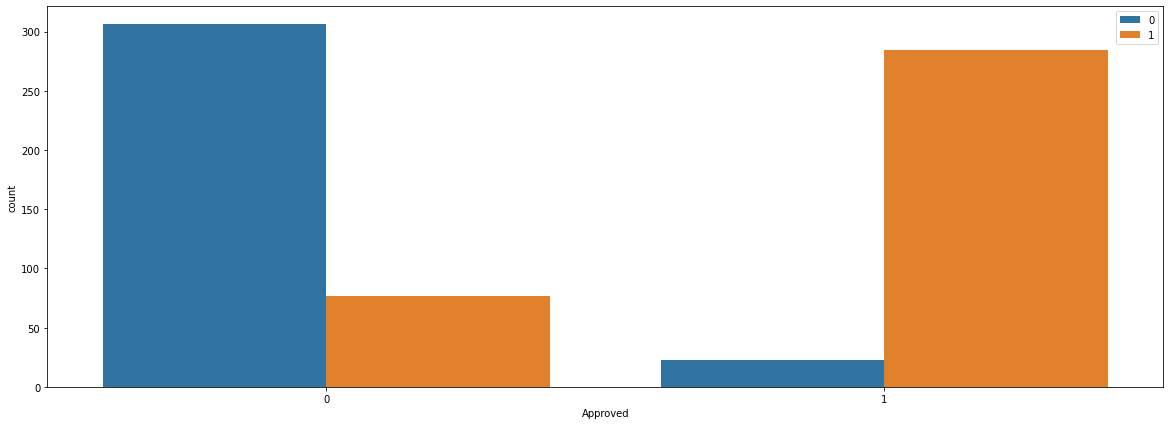

PriorDefault  p-value  7.298530125411298e-80  Good Predictor. There is significant relationship between the variables


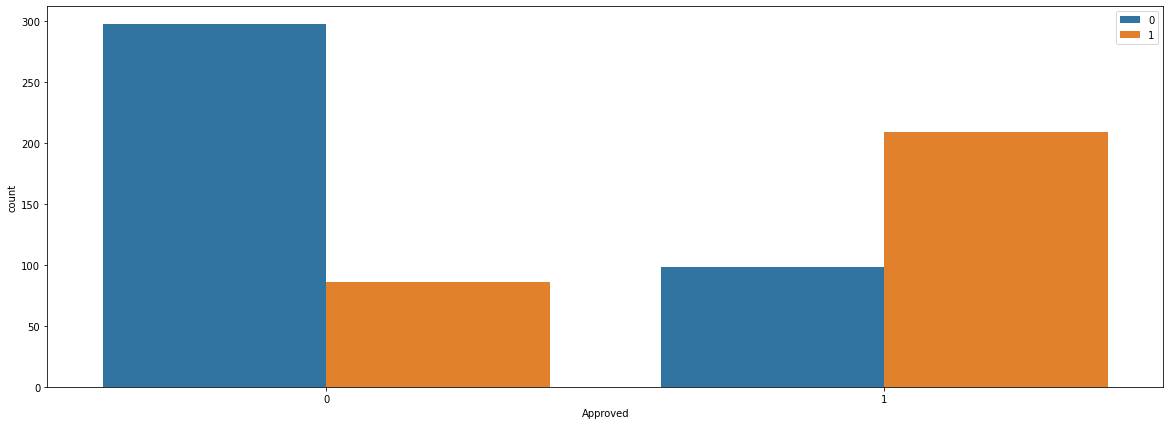

Employed  p-value  2.227269345312281e-33  Good Predictor. There is significant relationship between the variables


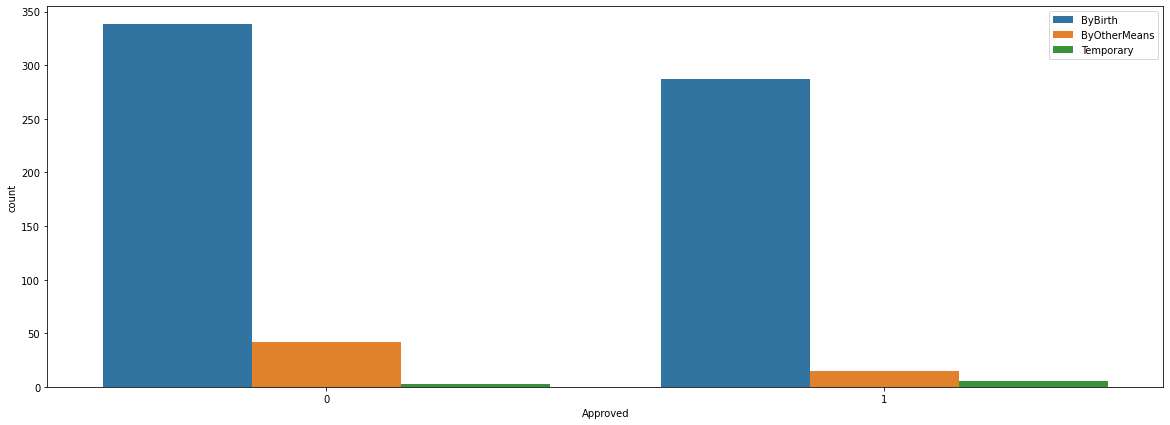

Citizen  p-value  0.010094291370456362  Good Predictor. There is significant relationship between the variables


In [8]:
for column in categorical:
    plt.figure(figsize=(20,7))
    sns.countplot(x = cc_apps.Approved, hue= cc_apps[column])
    plt.legend(loc='best')
    plt.show()
    crstab = pd.crosstab(cc_apps['Approved'],cc_apps[column])
    (stats, p, df,_) = chi2_contingency([crstab.iloc[0].values, crstab.iloc[1].values], correction=False)
    if p>0.05:
        print(column,"","p-value","",p," Bad Predictor. There is no significant relationship between the variables")
    else:
        print(column,"","p-value","",p," Good Predictor. There is significant relationship between the variables")

In [9]:
continuous = ['Age','Debt','YearsEmployed','CreditScore','Income']

Age  p-value  1.479154858352859e-05  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


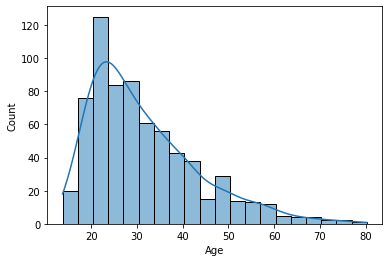

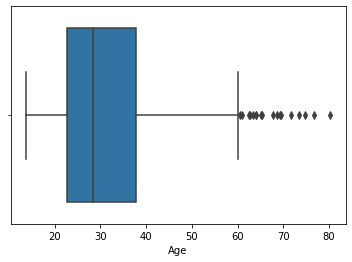

Debt  p-value  4.5516807023089123e-08  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


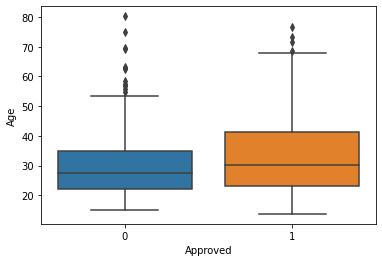

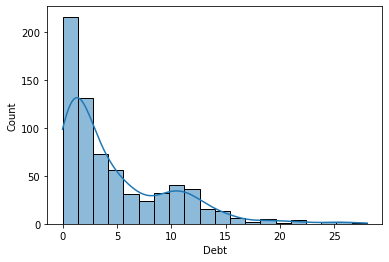

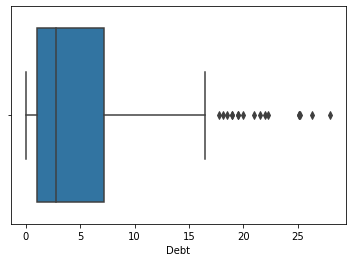

YearsEmployed  p-value  3.6710537401606784e-18  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


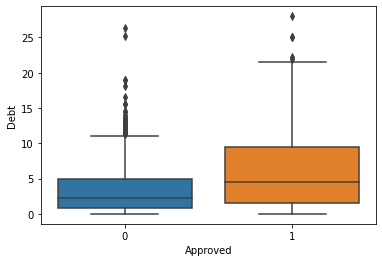

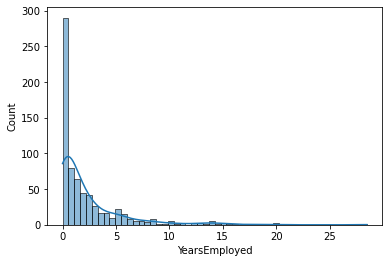

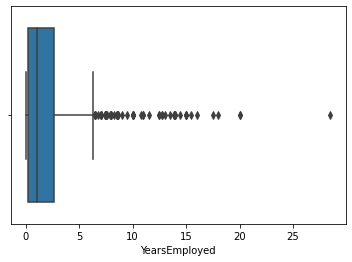

CreditScore  p-value  7.957718568080603e-29  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


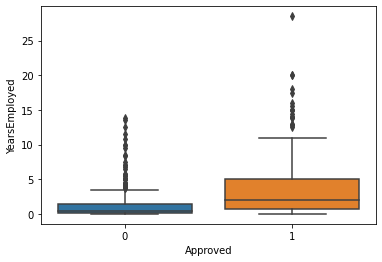

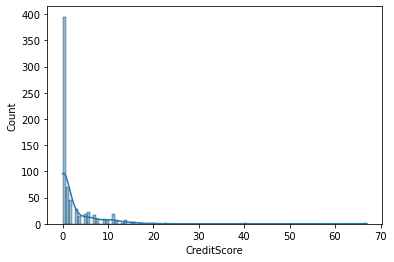

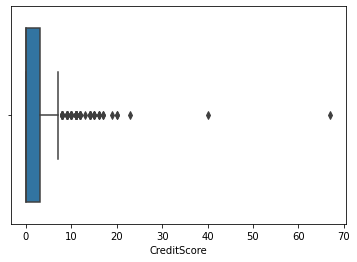

Income  p-value  3.4520256956293263e-06  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


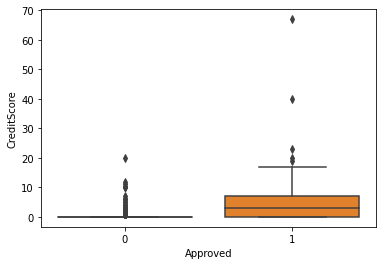

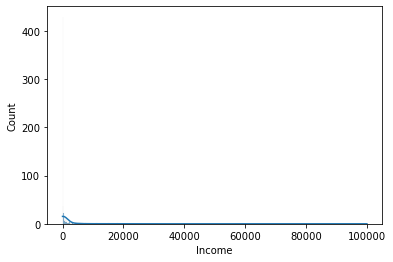

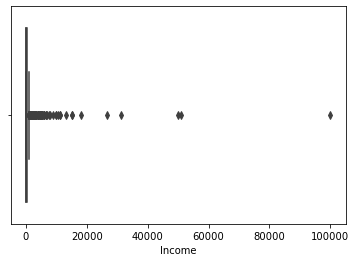

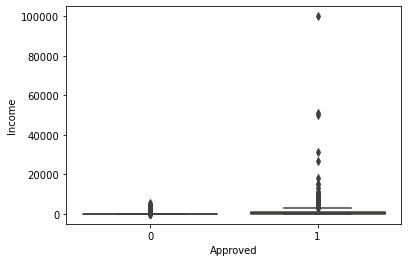

In [10]:
for column in continuous:
    model = ols('cc_apps[column]~Approved', data = cc_apps).fit()
    aov_table = sm.stats.anova_lm(model)
    #print(aov_table)
    p = aov_table['PR(>F)'][0]
    if p>0.05:
        print(column,"","p-value","",p," Bad Predictor. Avg of this feature is same for both card approved group and not approved group")
    else:
        print(column,"","p-value","",p," Good Predictor. Avg of this feature is not same for both card approved group and not approved group")
    plt.figure()
    sns.histplot(x = cc_apps[column], kde=True)
    plt.show()
    sns.boxplot(x = cc_apps[column], orient = 'h')
    plt.show()
    sns.boxplot(y = cc_apps[column], x = cc_apps.Approved)

In [11]:
cc_apps.Married.value_counts()

1    525
0    165
Name: Married, dtype: int64

In [12]:
cc_apps.BankCustomer.value_counts()

1    527
0    163
Name: BankCustomer, dtype: int64

In [13]:
cc_apps.PriorDefault.value_counts()

1    361
0    329
Name: PriorDefault, dtype: int64

In [14]:
cc_apps.Employed.value_counts()

0    395
1    295
Name: Employed, dtype: int64

In [15]:
cc_apps.Industry.value_counts()

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64

In [16]:
cc_apps.Ethnicity.value_counts()

White     408
Black     138
Asian      59
Latino     57
Other      28
Name: Ethnicity, dtype: int64

In [17]:
cc_apps.Citizen.value_counts()

ByBirth         625
ByOtherMeans     57
Temporary         8
Name: Citizen, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
cc_apps['Industry'] = le.fit_transform(cc_apps['Industry'])

In [20]:
cc_apps['Ethnicity'] = le.fit_transform(cc_apps['Ethnicity'])

In [21]:
cc_apps['Citizen'] = le.fit_transform(cc_apps['Citizen'])

In [22]:
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,120,0,1


In [23]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    int32  
 6   Ethnicity       690 non-null    int32  
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    int32  
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int32(3), int64(10)
memory usage: 78.3 KB


In [24]:
x = cc_apps.iloc[:, cc_apps.columns != 'Approved']

In [25]:
y = cc_apps.iloc[:, cc_apps.columns == 'Approved']

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
params = {'n_estimators': [50,150,250], 'max_features': ['sqrt', 0.25,0.5,0.75,1], 'min_samples_split': [2,4,6], 'max_depth': [2,3,5]}

In [28]:
rfc = RandomForestClassifier(random_state= 1, oob_score=True)

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
clf = RandomizedSearchCV(rfc, params, cv = 5, n_iter = 10)

In [31]:
model = clf.fit(x,y)

In [32]:
from pprint import pprint

In [33]:
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [35]:
rfc1 = RandomForestClassifier(random_state=1, max_depth=3, max_features='sqrt', n_estimators=50, oob_score=True)

In [36]:
model2 = rfc1.fit(x,y)

In [37]:
y_pred = model2.predict(x)

In [38]:
model2.score(x,y)

0.8710144927536232

In [39]:
model2.oob_score_

0.8507246376811595

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x, y, scoring='accuracy', cv = 5).mean()

In [ ]:
from sklearn.metrics imp